# Logistic Regresion
### Luis Chunga

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import pandas as pd
import time
import nltk

###  Reading data 

In [20]:
start_time = time.time()
Corpus = pd.read_csv("input/batches/email_batch_40.csv",encoding = "latin")
# Display First five
Corpus

,email,category
0,this cp has merged into pancanadian energy ser...,0
1,this morning roman blake with calp told robin ...,0
2,kay please forward to max yzaguirre max congra...,0
3,k how s life back in texas i am not sure if i ...,0
4,sent on behalf of laurie pare attached is my m...,0
...,...,...
2853,on line gaming report special online issue inv...,1
2854,account suspension dear paypal user in accorda...,1
2855,small cap stoxs can mean gains for you watch t...,1
2856,roletes e roldanas para empilhadeiras santos j...,1


In [21]:
### The dataset has 2 class, which 0 is Email and 1 is spam 
### There are 2033 unique email out of 2087 
### There are 1356 unique spam out of 1360 

Corpus.groupby('category').describe()

email                                                               
         count unique                                                top freq
category                                                                     
0         1497   1469  start date hourahead hour no ancillary schedul...   13
1         1360   1355  save on ce credits no hidden fees over credits...    2

Text(0.5, 1.0, 'Number of Emails and Spams')

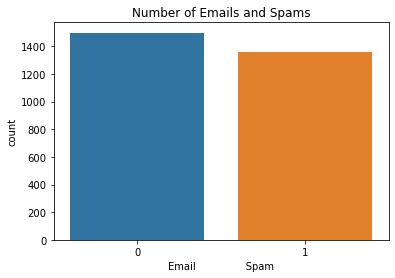

In [22]:
# Display
sns.countplot(Corpus.category)
plt.xlabel('Email                Spam')
plt.title('Number of Emails and Spams')

In [23]:
len(Corpus['email'])

2858

In [24]:
Corpus['email'][1]

'this morning roman blake with calp told robin barbe that calp never received the payment for the wire transfer this is the first i ve heard of this mark would you please verify that the payment went out i ve copied joanie because she talks to calp quite often and i just want her to know what is going on also i have a copy of the march bill i will go through it today and give mark a copy thanks mark feldman am to joan veselack corp enron enron cc chris germany hou ect ect subject re calp wire payment i set up the wire and sent the feb payment out today call if you need anything mark joan veselack enron pm to mark feldman hou ect ect cc pheuer edisonmission com rbakke edisonmission com dick jenkins hou ect ect robin barbe hou ect ect subject calp wire payment mark the information for wiring is at the bottom of the invoice please call paulette heuer at if you need any additional information thanks'

In [25]:
vectorizer = TfidfVectorizer("english")

In [26]:
# vectorize the corpus email 
message_mat = vectorizer.fit_transform(Corpus['email'].values.astype('U'))

In [27]:
message_mat[0]

<1x42169 sparse matrix of type '<class 'numpy.float64'>'
	with 22 stored elements in Compressed Sparse Row format>

### Splitting 80% for training and 20% for testing

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(message_mat, 
                                                    Corpus['category'], 
                                                    test_size=0.2, 
                                                    random_state=20)

In [29]:
#
lr = LogisticRegression(solver='lbfgs', max_iter=200, random_state=20).fit(X_train, Y_train)
yhat = lr.predict(X_test)

# the 3 lines below show how to invoke various output    
print("\n","-> Accuracy",accuracy_score(Y_test, yhat))
print("\n"," -> Classification Report\n",classification_report(Y_test, yhat),sep="")
print("\n","-> Classification Report\n",confusion_matrix(Y_test, yhat),sep="")


 -> Accuracy 0.9632867132867133

 -> Classification Report
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       312
           1       0.97      0.95      0.96       260

    accuracy                           0.96       572
   macro avg       0.96      0.96      0.96       572
weighted avg       0.96      0.96      0.96       572


-> Classification Report
[[304   8]
 [ 13 247]]


In [30]:
print("{:.2f} seconds".format(time.time() - start_time))

5.91 seconds


In [31]:

X_train[1][0]


<1x42169 sparse matrix of type '<class 'numpy.float64'>'
	with 81 stored elements in Compressed Sparse Row format>

In [32]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


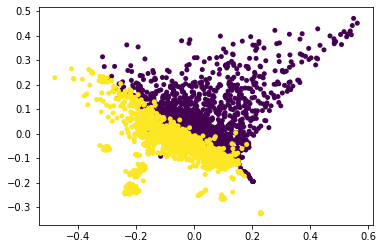

In [33]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
X = pipeline.fit_transform(Corpus.email.values.astype('U')).todense()

pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
plt.scatter(data2D[:,0], data2D[:,1], c=Corpus.category, s=4, linewidths=3 )


plt.show()              #not required if using ipython notebook





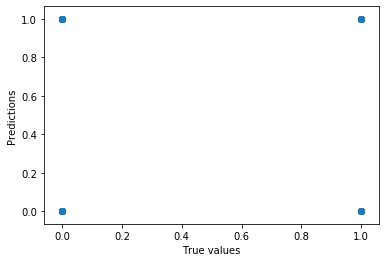

In [34]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Make cross validated predictions
predictions = cross_val_predict(lr, X_train, Y_train, cv=6)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.scatter(Y_train, predictions)

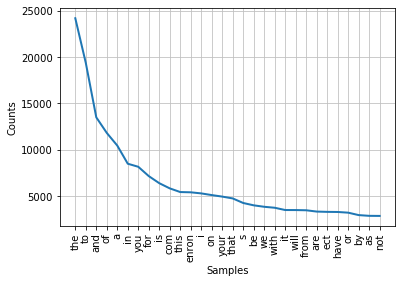

In [35]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

import nltk

tokenized_word=[]
fdist = FreqDist()
for i in Corpus.email.values.astype('U'):
  
    for word in word_tokenize(i):
        fdist[word] += 1
        
fdist.plot(30,cumulative=False)
plt.show()


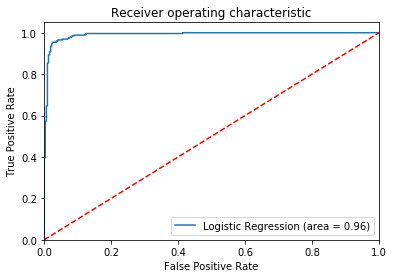

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Running all dataset

In [26]:
# CHANGE TO CODE 
from os import listdir
from os import path

start_time = time.time()
input_path = 'input/batches/'
paths = listdir(input_path)
number_of_runs= 49
total = 0
points=[]
total_acc = 0

press1T=0.0; recall1T=0.0; f1_s1T=0.0; supp1T=0.0
press2T=0.0; recall2T=0.0; f1_s2T=0.0; supp2T=0.0
f1_s3T=0.0; supp3T=0.0
press4T=0.0; recall4T=0.0; f1_s4T=0.0; supp4T=0.0
press5T=0.0; recall5T=0.0; f1_s5T=0.0; supp5T=0.0


mat = np.zeros((2, 2))

start_time = time.time()

for i in range(number_of_runs):
    if '.ipynb_checkpoints' in paths[i]:
        continue

    corpus = pd.read_csv(input_path+paths[i],encoding = "latin")

    message_mat = vectorizer.fit_transform(corpus['email'].values.astype('U'))
    X_train, X_test, Y_train, Y_test = train_test_split(message_mat, corpus['category'], test_size=0.2, random_state=20)

    lr = LogisticRegression(solver='lbfgs', max_iter=200, random_state=20).fit(X_train, Y_train)
    yhat = lr.predict(X_test)
    acc =accuracy_score(Y_test, yhat)
    
    class_report = classification_report(Y_test, yhat)
    class_report = class_report.split('\n')
    
    press1, recall1, f1_s1, supp1 =  [float(i) for i in class_report[2].split()[1:]]
    press1T+=press1; recall1T+=recall1; f1_s1T+=f1_s1; supp1T+=supp1
    
    press2, recall2, f1_s2, supp2 =  [float(i) for i in class_report[3].split()[1:]]
    press2T+=press2; recall2T+=recall2; f1_s2T+=f1_s2; supp2T+=supp2
    
    f1_s3, supp3 = [float(i) for i in class_report[5].split()[1:]]
    f1_s3T+=f1_s3; supp3T+=supp3
    
    press4, recall4, f1_s4, supp4 = [float(i) for i in class_report[6].split()[2:]]
    press4T+=press4; recall4T+=recall4; f1_s4T+=f1_s4; supp4T+=supp4
    
    
    press5, recall5, f1_s5, supp5 = [float(i) for i in class_report[7].split()[2:]]
    press5T+=press5; recall5T+=recall5; f1_s5T+=f1_s5; supp5T+=supp5
    
    con_mat = confusion_matrix(Y_test, yhat)  
    for i in range(len(mat)):
        for j in range(len(mat[i])):
            mat[i][j] += con_mat[i][j]
    
    points.append(acc)
    total_acc+=acc
    total +=1 
    #print('done ', i)
print("{:.2f} seconds".format(time.time() - start_time))



490.87 seconds


In [27]:
# the 3 lines below show how to invoke various output    
print("-> Accuracy",total_acc/total)

print("\n"," -> Classification Report\n")

print('{0:13} {1:12s} {2:7s} {3:10s} {4:8s}'.format(' ' , 'precision', 'recall', 'f1-score' , 'support'))

print('{0:9}  {1:6s} {2:5.2f} {3:9.2f} {4:9.2f} {5:9.0f}'.format( ' ','0',press1T/total, recall1T/total, f1_s1T/total, supp1T/total))
print('{0:9}  {1:6s} {2:5.2f} {3:9.2f} {4:9.2f} {5:9.0f}\n'.format( ' ','1',press2T/total, recall2T/total, f1_s2T/total, supp2T/total))
print('{0:2}  {1:33s} {2:5.2f} {3:9.0f}'.format( ' ','accuracy',f1_s3T/total, supp3T/total))
print('{0:1}  {1:14s} {2:5.2f} {3:9.2f} {4:9.2f} {5:9.0f}'.format( ' ','macro avg',press4T/total, recall4T/total, f1_s4T/total, supp4T/total))
print('{0:17s} {1:5.2f} {2:9.2f} {3:9.2f} {4:9.0f}'.format( 'weighted avg',press5T/total, recall5T/total, f1_s5T/total, supp5T/total))

print("\n","-> Classification Report\n")

print('{0:.0f}  {1:.0f}'.format(mat[0][0], mat[0][1]))
print('{0:.0f}  {1:.0f}'.format(mat[1][0], mat[1][1]))


-> Accuracy 0.9539944694826478

  -> Classification Report

              precision    recall  f1-score   support 
           0       0.96      0.95      0.96       311
           1       0.95      0.95      0.95       261

    accuracy                           0.95       572
   macro avg       0.95      0.95      0.95       572
weighted avg       0.95      0.95      0.95       572

 -> Classification Report

14232  686
577  11958


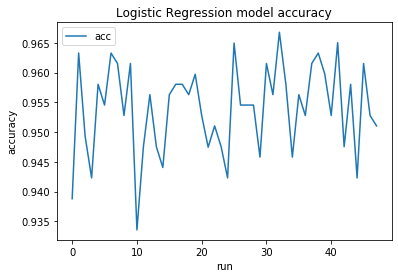

In [28]:
# summarize history for accuracy

plt.plot(points) 
plt.title('Logistic Regression model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('run')
plt.legend(['acc'], loc='upper left')

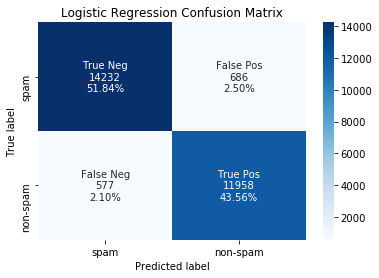

In [58]:
import seaborn as sns
cf_matrix = np.array([[14232, 686], [577, 11958]])
group_names = ['True Neg','False Pos','False Neg','True Pos']
categories = ['spam', 'non-spam']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels,xticklabels=categories, yticklabels=categories, fmt='', cmap='Blues')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

